# Imports 

In [708]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats
from collections import Counter
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics

In [709]:
df1 = pd.read_csv('genres_v2.csv')
df2 = pd.read_csv('playlists.csv')

/var/folders/gc/gk3zr2wx72sdktthwnv3m0800000gn/T/ipykernel_30912/2794950352.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('genres_v2.csv')


# Getting familiar and cleaning the data

In [711]:
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [712]:
df2.head()

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap


In [713]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_')

In [714]:
merged_df = df1.merge(df2, left_on='genre', right_on='genre', how='inner')

In [715]:
pd.set_option('display.max_columns', None)
merged_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,unnamed:_0,title,playlist
0,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,19WuHd4MxWLzE1fpMmw4S4
1,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,6XyR8uzgkSoDzHuOxxRtLH
2,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,37Ij3ofyhvEhFEH8YZMZ2X
3,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,07zTlfPpsxeoWdumbkNWMI
4,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,2dClSRLsnptdkDQnpi5H2f


In [716]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93876 entries, 0 to 93875
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      93876 non-null  float64
 1   energy            93876 non-null  float64
 2   key               93876 non-null  int64  
 3   loudness          93876 non-null  float64
 4   mode              93876 non-null  int64  
 5   speechiness       93876 non-null  float64
 6   acousticness      93876 non-null  float64
 7   instrumentalness  93876 non-null  float64
 8   liveness          93876 non-null  float64
 9   valence           93876 non-null  float64
 10  tempo             93876 non-null  float64
 11  type              93876 non-null  object 
 12  id                93876 non-null  object 
 13  uri               93876 non-null  object 
 14  track_href        93876 non-null  object 
 15  analysis_url      93876 non-null  object 
 16  duration_ms       93876 non-null  int64 

In [717]:
merged_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,unnamed:_0
count,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,0.0
mean,0.640232,0.672124,5.135285,-6.816974,0.588979,0.158851,0.167220,0.083819,0.198505,0.410168,152.442228,199689.078977,3.961620,NaN
std,0.164815,0.187146,3.658011,2.966376,0.492022,0.135390,0.219114,0.231762,0.153884,0.233549,29.079427,60565.124169,0.339573,NaN
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.021000,0.020600,57.967000,38333.000000,1.000000,NaN
25%,0.524000,0.541000,1.000000,-8.435000,0.000000,0.049900,0.011800,0.000000,0.101000,0.214000,129.985000,156223.500000,4.000000,NaN
50%,0.654000,0.680000,5.000000,-6.405000,1.000000,0.104000,0.069800,0.000002,0.132000,0.392000,149.975000,199173.000000,4.000000,NaN
75%,0.768000,0.824000,8.000000,-4.766000,1.000000,0.246000,0.237000,0.001050,0.258000,0.585000,175.330000,236093.000000,4.000000,NaN
max,0.988000,0.999000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.973000,0.980000,220.290000,728413.000000,5.000000,NaN


In [718]:
merged_df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name              30
unnamed:_0          93876
title               93876
playlist                0
dtype: int64

In [719]:
merged_df = merged_df.drop(['track_href', 'type', 'analysis_url', 'uri','title', 'unnamed:_0'], axis=1)

In [720]:
merged_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,song_name,playlist
0,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,19WuHd4MxWLzE1fpMmw4S4
1,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,6XyR8uzgkSoDzHuOxxRtLH
2,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,37Ij3ofyhvEhFEH8YZMZ2X
3,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,07zTlfPpsxeoWdumbkNWMI
4,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,2dClSRLsnptdkDQnpi5H2f


In [721]:
def outliers_IQR (column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers 

outliers = merged_df.select_dtypes(include=['number']).apply(outliers_IQR)
outliers.sum()

danceability          138
energy                267
key                     0
loudness             2166
mode                    0
speechiness          1092
acousticness         7336
instrumentalness    20905
liveness             5580
valence                 0
tempo                   6
duration_ms          1104
time_signature       6315
dtype: int64

# Predictive Analysis

In [723]:
# pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.linear_model.LogisticRegression())
# X = merged_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
# y = merged_df['genre']
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [724]:
# pipeline.fit(X_train, y_train)

In [725]:
# y_pred = pipeline.predict(X_test)
# sklearn.metrics.accuracy_score(y_pred, y_test)

In [726]:
# print(sklearn.metrics.classification_report(y_pred, y_test))

# Charts

<Axes: xlabel='genre', ylabel='tempo'>

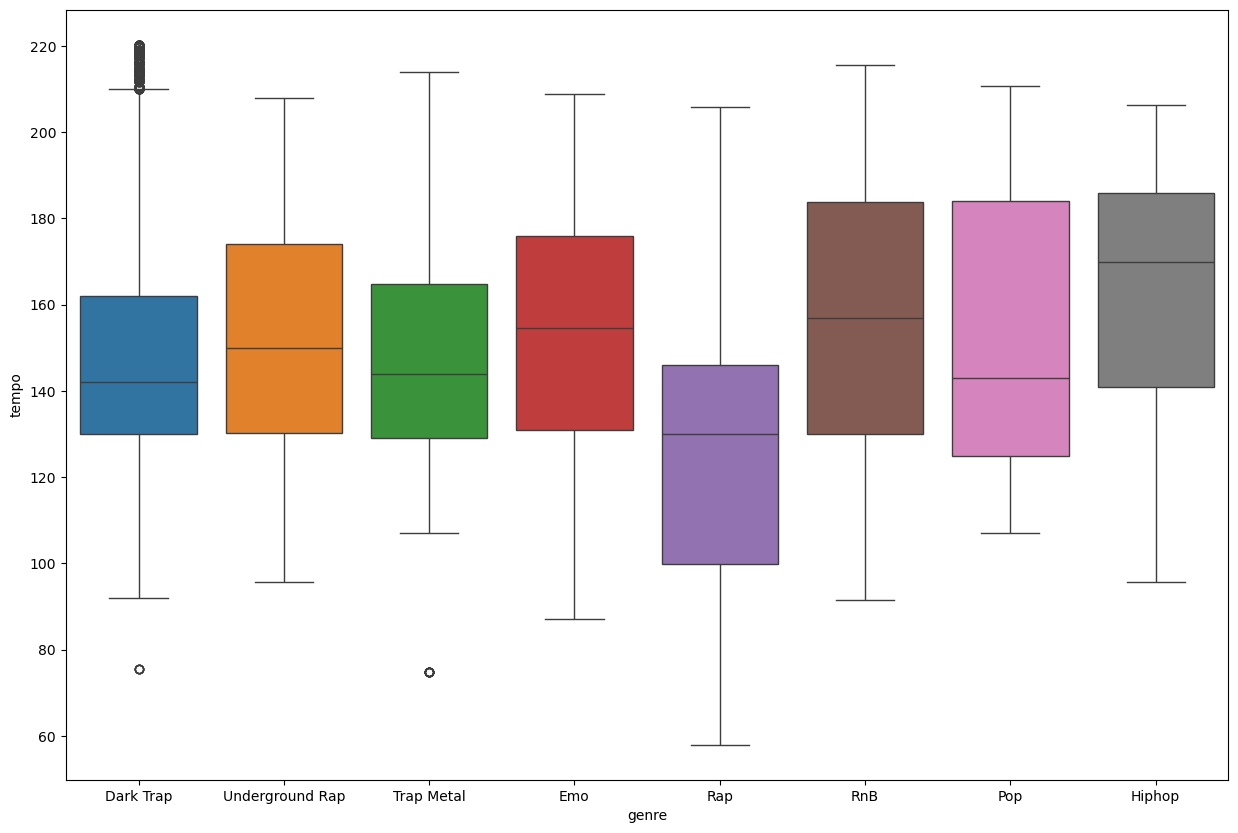

In [728]:
# Tempo and Genre
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=merged_df, x='genre', y='tempo', hue='genre')

## Interpretation
- There is a large chunk of outliers for Dark Trap but there does not appear to be many outliers for any other genre. This needs to be explored as to why that is
- Raps' tempo is significantly lower on average than other genres

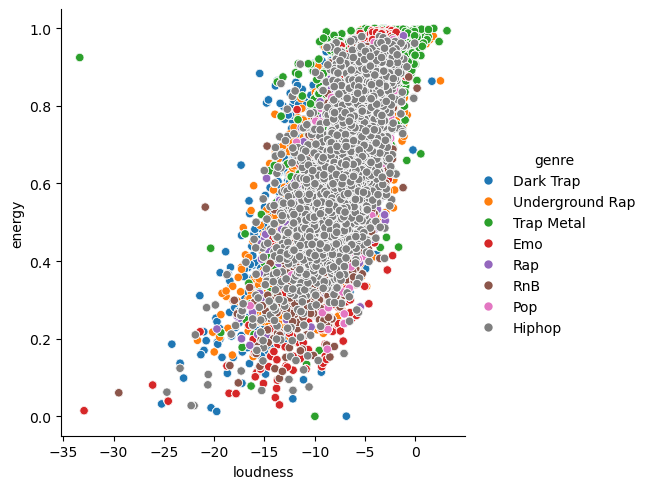

In [730]:
# Loudness x Energy by Genre
sns.relplot(data=merged_df, x='loudness', y='energy', hue='genre')

## Interpretation

- The more energy there is the louder a song tends to be

Text(0, 0.5, 'Loudness')

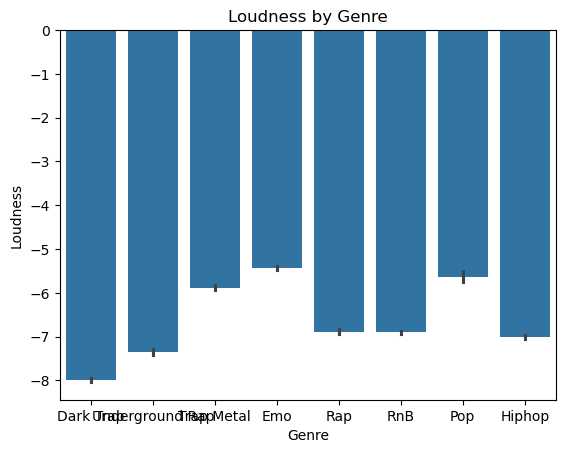

In [732]:
# Need to format barchart better

sns.barplot(data=merged_df, x='genre', y='loudness')
plt.title('Loudness by Genre')
plt.xlabel('Genre')
plt.ylabel('Loudness')

## Interpretation

- The genre of Dark Trap has the most loudness where as Emo has the least

# Determining Average Tempo and Danceability by Genre

In [735]:
avg_tempo_by_genre = merged_df.groupby('genre')['tempo'].mean().reset_index()
avg_tempo_by_genre.columns = ['genre', 'average tempo']

avg_danceability_by_genre = merged_df.groupby('genre')['danceability'].mean().reset_index()
avg_danceability_by_genre.columns = ['genre', 'average danceability']

In [736]:
merged_tempo_danceability = pd.merge(avg_tempo_by_genre, avg_danceability_by_genre, on='genre', how='left')
merged_tempo_danceability.head(8)

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
1,Emo,153.888640,0.493699
2,Hiphop,162.980479,0.698982
3,Pop,152.098937,0.676807
4,Rap,126.006374,0.742877
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [737]:
merged_tempo_danceability['genre'] = merged_tempo_danceability['genre'].astype(str)
merged_tempo_danceability['average tempo'] = merged_tempo_danceability['average tempo'].astype(float)
merged_tempo_danceability['average danceability'] = merged_tempo_danceability['average danceability'].astype(float)

print(merged_tempo_danceability.dtypes)

genre                    object
average tempo           float64
average danceability    float64
dtype: object


Text(0, 0.5, 'Genre')

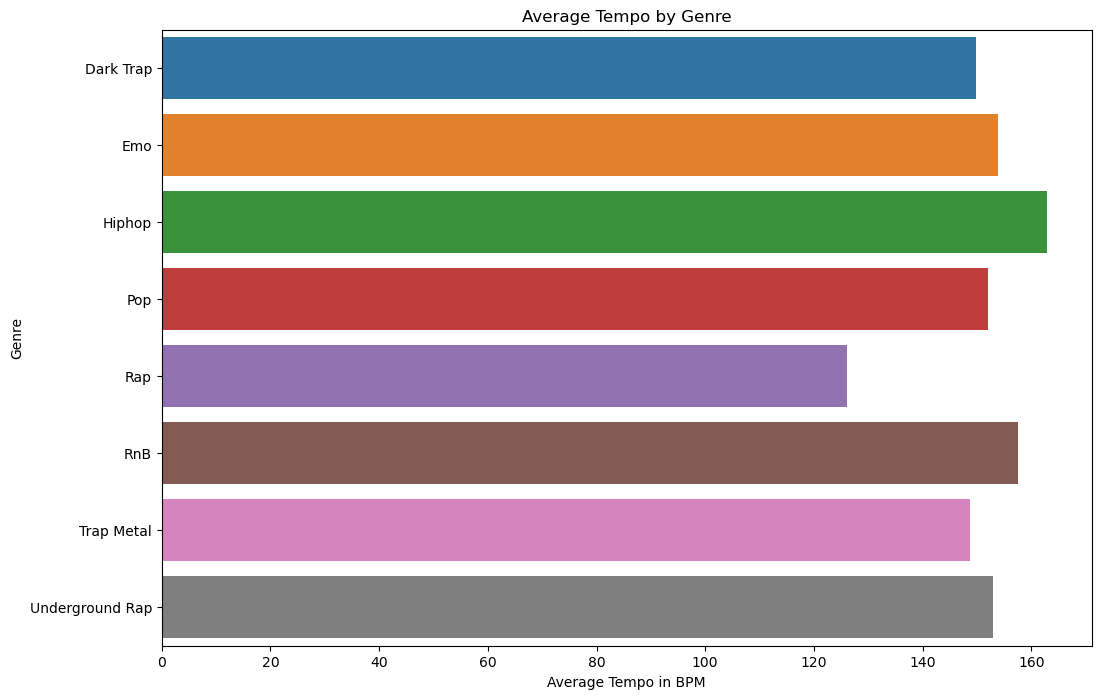

In [738]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average tempo', y='genre', data=avg_tempo_by_genre, hue='genre')

plt.title('Average Tempo by Genre')
plt.xlabel('Average Tempo in BPM')
plt.ylabel('Genre')

Text(0, 0.5, 'Genre')

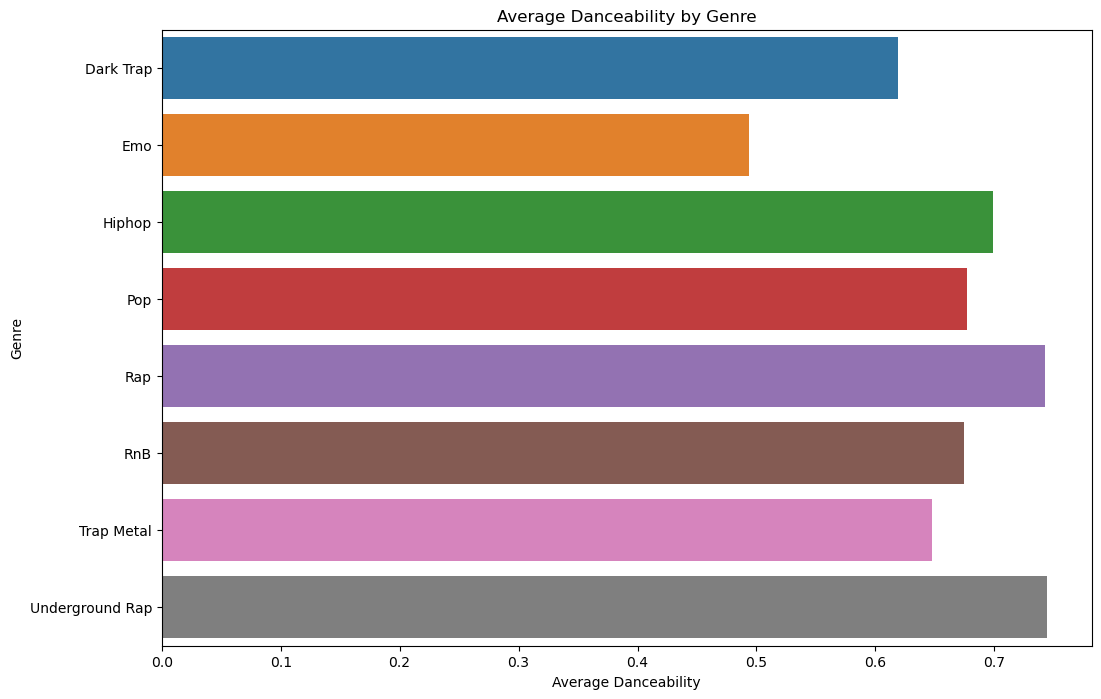

In [739]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average danceability', y='genre', data=avg_danceability_by_genre, hue='genre')

plt.title('Average Danceability by Genre')
plt.xlabel('Average Danceability')
plt.ylabel('Genre')

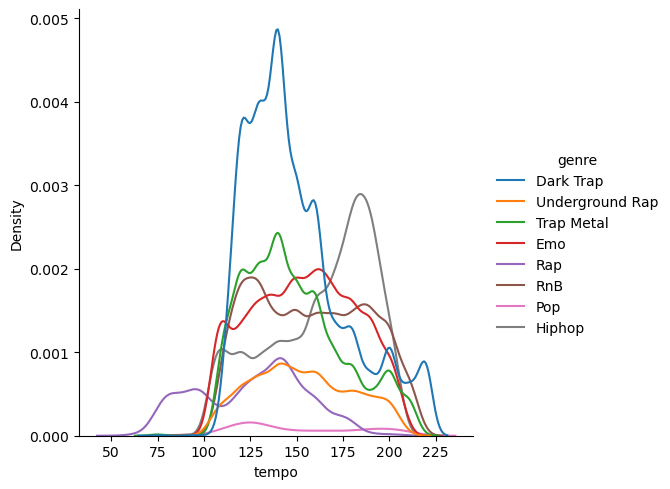

In [740]:
sns.displot(merged_df, x='tempo', hue='genre', kind='kde')

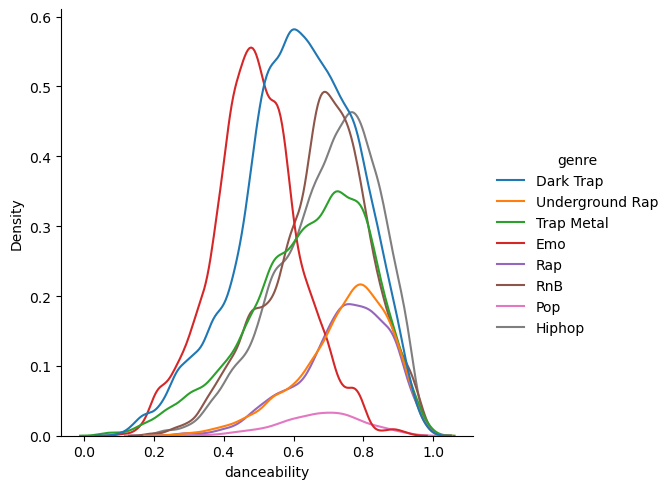

In [741]:
sns.displot(merged_df, x='danceability', hue='genre', kind='kde')

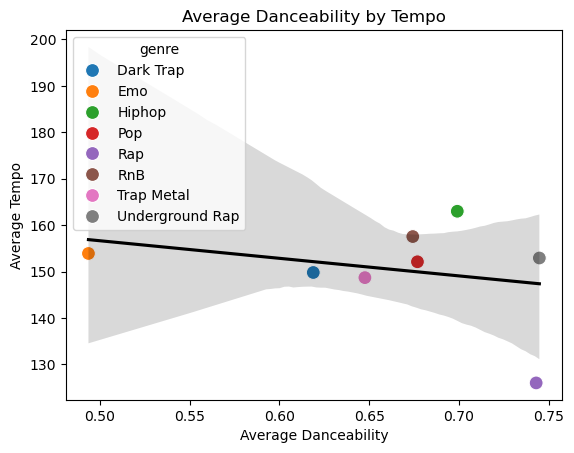

In [742]:
sns.scatterplot(
    data=merged_tempo_danceability, 
    x='average danceability', 
    y='average tempo', 
    hue="genre",
    palette="tab10",
    s=100)

sns.regplot(
    data=merged_tempo_danceability, 
    x='average danceability', 
    y='average tempo', 
    scatter=False,
    line_kws={'color': 'black'}
)

plt.xlabel('Average Danceability')
plt.ylabel('Average Tempo')
plt.title('Average Danceability by Tempo')
plt.show()

In [743]:
correlation = merged_tempo_danceability['average tempo'].corr(merged_tempo_danceability['average danceability'])
print(f"Correlation between Average Tempo and Average Danceability: {correlation}")

Correlation between Average Tempo and Average Danceability: -0.28068477113136747


In [744]:
def is_outlier(column: pd.Series):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~column.between(lower_bound, upper_bound)

merged_tempo_danceability[~is_outlier(merged_tempo_danceability['average tempo'])]

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
1,Emo,153.888640,0.493699
3,Pop,152.098937,0.676807
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [745]:
def is_outlier(column: pd.Series):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~column.between(lower_bound, upper_bound)

merged_tempo_danceability[~is_outlier(merged_tempo_danceability['average danceability'])]

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
2,Hiphop,162.980479,0.698982
3,Pop,152.098937,0.676807
4,Rap,126.006374,0.742877
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [746]:
# Filtered out 'emo' and 'rap' genres
filtered_data = merged_tempo_danceability[~merged_tempo_danceability['genre'].isin(['Emo', 'Rap'])]
correlation = filtered_data['average tempo'].corr(filtered_data['average danceability'])
print(f"Correlation between Average Tempo and Average Danceability (omitting emo and rap): {correlation}")

Correlation between Average Tempo and Average Danceability (omitting emo and rap): 0.44537958654919263


# Interpretation
Our goal was to see if there was any correlation between the tempo of a genre and the danceability per song.

First we needed to group the tempos and danceability categories together by genre type. We then took the mean for each category to so that we were working with one numerical data point per genre per category. We merged those two new values into its own data frame and converted the data types to strings and floats as needed. 

We made two bar plots to showcase the averages for each category by genre as a visual. Here we see that ‘Rap’ has the slowest tempo whereas ‘Hiphop’ has the fastest. For danceability, ‘Underground Rap’ has the highest value just barely squeaking past ‘Rap’, whereas ‘Emo’ has the slowest. 

We chose to display this information differently via a distribution plot, using the data from the original data frame and breaking it down by genre. Here it shows that for tempo there are a few genres, like ‘Dark Trap’ for instance, that appear to have the majority of their tempo in a small range of 120-150 where as ‘Pop’ is more spread out across the entire range. Danceability had a similar display where ‘Pop’ is once again spread across the full range whereas other genres seemed to peak between a smaller range. 


Overall there seems to be a weak negative correlation between danceability and tempo. When taking a look at the lined scatter plot above we noticed that the genres of 'Rap' and 'Emo' seemed to be outliers for the dataset. After removing both of them and running the correlation again it improved from a -0.28 to a .45. This updated data indicates a moderate correlation between the two features.

We created a regression plot to showcase how the two variables interact with one another and found that, combined with running a correlation test, there seems to be a weak negative correlation between danceability and tempo. When taking a look at the lined scatter plot above we noticed that the genres of 'Rap' and 'Emo' seemed to be outliers for the dataset. After removing both of them and running the correlation again it improved from a -0.28 to a .45. This updated data indicates a moderate correlation between the two features.

# Playlist count by genre type

<Axes: xlabel='Count', ylabel='genre'>

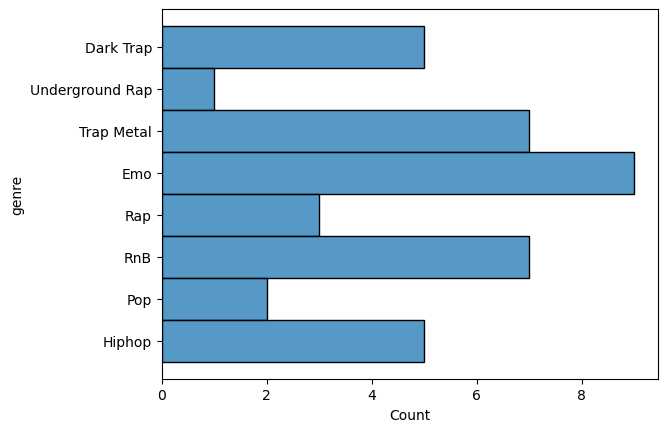

In [749]:
sns.histplot(data=df2, y='genre')

# Interpretation

- Emo is the most popular genre type
- Underground Rap is the least popular genre type